In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Toxic Comments/train.csv')

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159437,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159438,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159439,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159440,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159437,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159438,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159439,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159440,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159441,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [ ]:
df[df.columns[2:]].iloc[1]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 1, dtype: int64

Preprocess

In [ ]:
from tensorflow.keras.layers import TextVectorization


In [ ]:
  X = df['comment_text']
  Y = df[df.columns[2:]].values

In [ ]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159437,0,0,0,0,0,0
159438,0,0,0,0,0,0
159439,0,0,0,0,0,0
159440,0,0,0,0,0,0


In [ ]:
MAX_FEATURE = 200000 # num of words in vocab

In [ ]:
vectorizer = TextVectorization(max_tokens= MAX_FEATURE,output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [ ]:
vectorizer("hello world life is great")

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [ ]:
vectorizer_text = vectorizer(X.values)

In [ ]:
vectorizer_text

<tf.Tensor: shape=(159442, 1403), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2487, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32428,  7385,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
# Data pipelineing
# steps (MCSBP) = map, cache,shuffle,batch,prefetch.
# insentrate the pipeline = from_tensor_slices,list_file.
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text,Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
batch_X, batch_Y = dataset.as_numpy_iterator().next()

In [ ]:
batch_X.shape , batch_Y.shape

((16, 1403), (16, 6))

In [ ]:
len(dataset)

9966

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [ ]:
len(train),len(val),len(test)

(6976, 1993, 996)

In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[ 308,    6,  380, ...,    0,    0,    0],
        [  70,  265,   35, ...,    0,    0,    0],
        [ 115, 1152,  379, ...,    0,    0,    0],
        ...,
        [  23,    7,  241, ...,    0,    0,    0],
        [ 248,  111,    4, ...,    0,    0,    0],
        [  67,    8,   59, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

CREATE SEQUENTIAL MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dropout ,Bidirectional , Dense , Embedding

In [ ]:
model = Sequential()
# create the embedding layer
model.add(Embedding(MAX_FEATURE+1,32))
#Bidirection LSTM Layer
model.add(Bidirectional(LSTM(32,activation = 'tanh')))
# Feature extraction fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
# Final Layer
model.add(Dense(6,activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history = model.fit(train, epochs=2 ,validation_data= val)

Epoch 1/2
6976/6976 [==============================] - 9383s 1s/step - loss: 0.0632 - val_loss: 0.0445
Epoch 2/2
6976/6976 [==============================] - 9307s 1s/step - loss: 0.0457 - val_loss: 0.0411


In [ ]:
history.history

{'loss': [0.06319338083267212, 0.04569374769926071],
 'val_loss': [0.04449735954403877, 0.041116196662187576]}

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

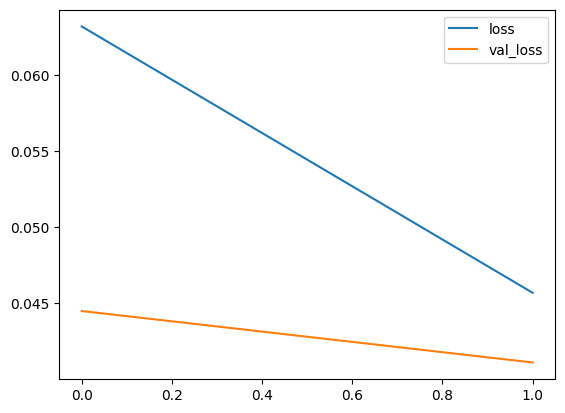

In [ ]:
# for training
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()


In [ ]:
input_text = vectorizer('You freaking suck !')

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
input_text

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([   7, 7155,  397])>

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X , batch_Y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 1s 1s/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 799ms/step


EVALUATE MODEL

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  #Unpack the batch
  X_true, Y_true = batch
  # Make a predication
  yhat = model.predict(X_true)
  # Flatten the Prediction
  Y_true = Y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(Y_true, yhat)
  re.update_state(Y_true, yhat)
  acc.update_state(Y_true, yhat)

1/1 [==============================] - 0s 174ms/step


In [ ]:
print(f' Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

 Precision: 0.8244321942329407, Recall: 0.7513286471366882, Accuracy: 0.4879518151283264


Test and Gradio

In [ ]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr
import tensorflow as tf

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaken hate you !')

In [ ]:
re = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 5s 5s/step


In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res

array([[0.99587667, 0.25897288, 0.95633495, 0.04391751, 0.8072083 ,
        0.18019256]], dtype=float32)

In [ ]:
def score_comment(comment):
  vectorizer_comment = vectorizer([comment])
  result = model.predict(vectorizer_comment)

  text = ''
  for idx,col in enumerate(df.columns[2:]):
    text +='{}: {}\n'.format(col,result[0][idx]>0.5)

  return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs = gr.inputs.Textbox(lines= 2, placeholder = 'Comment to score'),
                         outputs = 'text')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5762f3a73daa2aaee3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
